<a href="https://colab.research.google.com/github/shubhamnsut/BTP/blob/main/BTP_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%load_ext autoreload
%autoreload 2

# UV News Data Input

In [ ]:
import pandas as pd
import numpy as np

true_path = '/content/drive/MyDrive/Fake_new_using_BERT/True.csv'
fake_path = '/content/drive/MyDrive/Fake_new_using_BERT/Fake.csv'

true_df = pd.read_csv(true_path)
fake_df = pd.read_csv(fake_path)

In [ ]:
display(true_df)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
display(fake_df)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


# Data Visulization

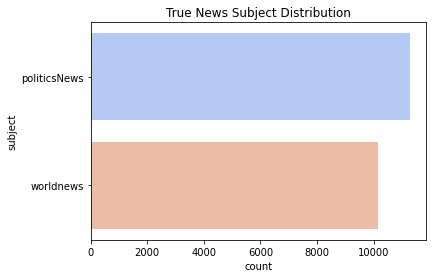

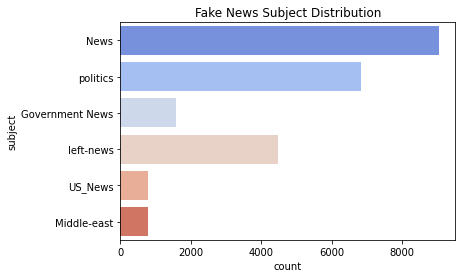

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="subject", palette="coolwarm", data=true_df).set_title('True News Subject Distribution')
plt.show()

sns.countplot(y="subject", palette="coolwarm", data=fake_df).set_title('Fake News Subject Distribution')
plt.show()

## Real News Word Cloud

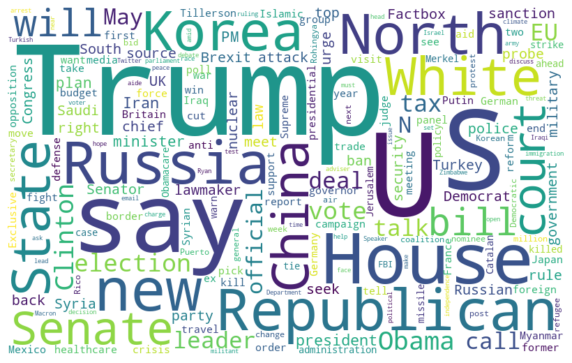

In [ ]:
from wordcloud import WordCloud

real_titles = true_df.title
real_titles_ls = [text for text in real_titles]
# print(alls)
real_all_words = ' '.join(real_titles)
wordcloud_real = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(real_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

## Fake News Word Cloud

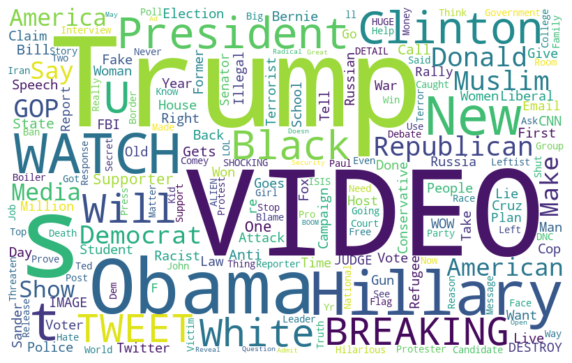

In [ ]:
fake_titles = fake_df.title
fake_titles_ls = [text for text in fake_titles]
# print(alls)
fake_all_words = ' '.join(fake_titles)
wordcloud_fake = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(fake_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Preprocessing

## Data Combination

In [ ]:
# Add Labels to both df
true_df['true'] = 1
fake_df['true'] = 0

# Concat
df = pd.concat([true_df, fake_df])
display(df)

,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


## Inspect Lengths of News

In [ ]:
titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 44898
Max length of the titles: 42
Mean length of the titles: 12.453472315025168


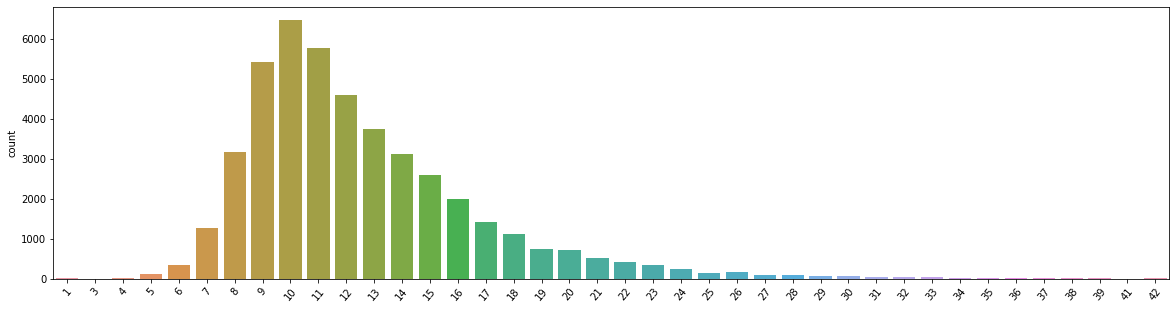

In [ ]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [ ]:
texts = [text for text in df.text]

max_len = 0
texts_len = []
for text in texts:
    texts_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)

# g = sns.countplot(x=texts_len)
print('Mean length of the texts:', np.mean(texts_len))

Mean length of the texts: 405.28228428883244


## Purify & Shffle the DataFrame

In [ ]:
from sklearn.utils import shuffle

# Purify
df = df.iloc[:,[0, -1]]

# Shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,title,true
0,Kansas governor vetoes Medicaid expansion bill,1
1,BREAKING: MUSLIM TERRORISTS Strike Two Popular...,0
2,"Iran, EU and Russia defend nuclear deal after ...",1
3,Italy rescues more than 250 migrants in Medite...,1
4,German foreign minister says Trump dangerous f...,1
...,...,...
44893,"Turkey says U.S. isolated on Jerusalem, issuin...",1
44894,FLORIDA SHERIFF Hysterically Shames Woman Bust...,0
44895,Trump edges ahead of Clinton in U.S. president...,1
44896,WATCH DAN BONGINO CALL OUT CNN HOST For Ridicu...,0


## Split Data into Training, Validation, Test

In [ ]:
train_val_df = df.sample(frac = 0.8)
test_df = df.drop(train_val_df.index)

train_df = train_val_df.sample(frac = 0.8)
val_df = train_val_df.drop(train_df.index)

# Reset Index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)
print('testset size:', test_df.shape)

trainset size: (28734, 2)
valset size: (7184, 2)
testset size: (8980, 2)


## Data distribution imbalanced

In [ ]:
train_imbalanced = 1/10
val_imbalanced = 1/10
test_imbalanced = 1/10

train_true = train_df[train_df['true'] == 1]
train_fake = train_df[train_df['true'] == 0]
train_fake = train_fake.iloc[:round(len(train_fake)*train_imbalanced),:]
train_true_len = len(train_true)
train_fake_len = len(train_fake)
train_df = pd.concat([train_true, train_fake])
train_df = shuffle(train_df).reset_index(drop=True)

val_true = val_df[val_df['true'] == 1]
val_fake = val_df[val_df['true'] == 0]
val_fake = val_fake.iloc[:round(len(val_fake)*val_imbalanced),:]
val_true_len = len(val_true)
val_fake_len = len(val_fake)
val_df = pd.concat([val_true, val_fake])
val_df = shuffle(val_df).reset_index(drop=True)

test_true = test_df[test_df['true'] == 1]
test_fake = test_df[test_df['true'] == 0]
test_fake = test_fake.iloc[:round(len(test_fake)*test_imbalanced),:]
test_true_len = len(test_true)
test_fake_len = len(test_fake)
test_df = pd.concat([test_true, test_fake])
test_df = shuffle(test_df).reset_index(drop=True)

len_df = pd.DataFrame({'ind': ['Train', 'Validation', 'Test'], 'True': [train_true_len, val_true_len, test_true_len], 'Fake': [train_fake_len, val_fake_len, test_fake_len]})
len_df.set_index('ind', inplace=True)
len_df.index.name = None

len_df

,True,Fake
Train,13715,1502
Validation,3487,370
Test,4215,476


## Dataframe to csv

In [ ]:
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

## Concatenate all dataframe

In [ ]:
df = pd.concat([train_df, val_df, test_df])
df

,title,true
0,"CNN, Brazile part ways amid renewed WikiLeaks ...",1
1,Trump administration backs looser Obamacare wa...,1
2,Judge rejects bid by 18 states to revive Obama...,1
3,Ukraine's Tymoshenko expects fair U.S. ruling ...,1
4,Rich would benefit most from Trump tax cut pla...,1
...,...,...
4686,OBAMA BRAGS About Hijacking 1.35 Million Acres...,0
4687,"Glad to see Obama go, Gulf Arabs expect Trump ...",1
4688,Black Politician Explains Why Left’s ‘Racist’ ...,0
4689,First German immigration law on agenda as Merk...,1


## Performing Data Cleaning

In [ ]:
import nltk
# Downloading Stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Obtaining Additional Stopwords From nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# Removing Stopwords And Remove Words With 2 Or Less Characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
import gensim

# Applying The Function To The Dataframe
df['clean'] = df['title'].apply(preprocess)

## Obtaining The Total Words Present In The Dataset

In [ ]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

14130

## Preparing The Data By Performing Tokenization And Padding

In [ ]:
from nltk import word_tokenize

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(train_df['title'])

train_sequences = tokenizer.texts_to_sequences(train_df['title'])
val_sequences = tokenizer.texts_to_sequences(val_df['title'])
test_sequences = tokenizer.texts_to_sequences(test_df['title'])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Adding Padding
padded_train = pad_sequences(train_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_val = pad_sequences(val_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 42, padding = 'post', truncating = 'post')

## Building And Training CNN Model

# CNN_BidirectionalLSTM


In [ ]:
## Creating model Using CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout, BatchNormalization

embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=42))

model.add(Dropout(0.3))

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 42, 40)            565200    
                                                                 
 dropout (Dropout)           (None, 42, 40)            0         
                                                                 
 conv1d (Conv1D)             (None, 38, 32)            6432      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            5152      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 32)            0         
 1D)                                                    

In [ ]:
y_train = np.asarray(train_df['true'])
y_val = np.asarray(val_df['true'])

# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_data=(padded_val, y_val), epochs = 3)

Epoch 1/3
238/238 [==============================] - 16s 13ms/step - loss: 0.1845 - accuracy: 0.9424 - val_loss: 0.0753 - val_accuracy: 0.9767
Epoch 2/3
238/238 [==============================] - 2s 10ms/step - loss: 0.0373 - accuracy: 0.9876 - val_loss: 0.0701 - val_accuracy: 0.9754
Epoch 3/3
238/238 [==============================] - 2s 10ms/step - loss: 0.0096 - accuracy: 0.9973 - val_loss: 0.0839 - val_accuracy: 0.9741


## Assessing Trained Model Performance

147/147 [==============================] - 1s 3ms/step
CNN Model Accuracy :  0.9759113195480708
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       476
           1       0.98      0.99      0.99      4215

    accuracy                           0.98      4691
   macro avg       0.95      0.91      0.93      4691
weighted avg       0.98      0.98      0.98      4691



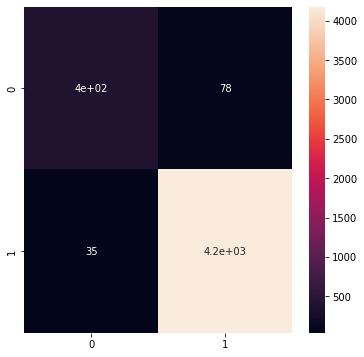

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Making prediction
prediction = (model.predict(padded_test) > 0.5).astype("int32")

# Getting The Accuracy
y_test = np.asarray(test_df['true'])

accuracy = accuracy_score(list(y_test), prediction)

print("CNN Model Accuracy : ", accuracy)


# Getting The Confusion Matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

print(classification_report(y_test, prediction))

# BERT

In [ ]:
!pip install transformers

import torch
from transformers import BertTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.2 MB/s 
     |████████████████████████████████| 7.6 MB 41.1 MB/s 
     |████████████████████████████████| 163 kB 65.8 MB/s 


In [ ]:
PRETRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

## Load Dataset Class

In [ ]:
from torch.utils.data import Dataset

class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ['train', 'val', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer  # BERT tokenizer
    
    # Define a function that returns a training/test data
    def __getitem__(self, idx):
        if self.mode == 'test':
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
        else:
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
            
        # Create BERT tokens for the first sentence and add separators [SEP]
        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(statement)
        word_pieces += statement + ['[SEP]']
        len_st = len(word_pieces)
        
#         # BERT for the second sentence tokens
#         tokens_b = self.tokenizer.tokenize(text_b)
#         word_pieces += tokens_b + ["[SEP]"]
#         len_b = len(word_pieces) - len_a
        
       # convert the entire token Sequence converted to indexed sequence
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        
        # Put the first sentence containing [SEP] token location is set to 0
        segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)
        
        return (tokens_tensor, segments_tensor, label_tensor)
    
    def __len__(self):
        return self.len
    
    
# Initialize Datasets for Transformation
trainset = FakeNewsDataset('train', tokenizer=tokenizer)
valset = FakeNewsDataset('val', tokenizer=tokenizer)
testset = FakeNewsDataset('test', tokenizer=tokenizer)

print('trainset size:' ,trainset.__len__())
print('valset size:',valset.__len__())
print('testset size: ',testset.__len__())

trainset size: 15217
valset size: 3857
testset size:  4691


## Sampling and Observing Tensors

In [ ]:
# select the first sample
sample_idx = 0

# take out the original text for comparison
statement, label = trainset.df.iloc[sample_idx].values

# Use the newly created Dataset Take out the converted id tensors
tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]

# Will tokens_tensor revert to text
tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text = " ".join(tokens)

# Differences before and after rendering，no response is a print。You can see the output directly
print(f"""
original_statement: 
{statement}

tokens: 
{tokens}

label: {label}

--------------------

tokens_tensor: 
{tokens_tensor}

segments_tensor: 
{segments_tensor}

label_tensor: 
{label_tensor}

""")


original_statement: 
CNN, Brazile part ways amid renewed WikiLeaks controversy

tokens: 
['[CLS]', 'cnn', ',', 'brazil', '##e', 'part', 'ways', 'amid', 'renewed', 'wi', '##ki', '##lea', '##ks', 'controversy', '[SEP]']

label: 1

--------------------

tokens_tensor: 
tensor([  101, 13229,  1010,  4380,  2063,  2112,  3971, 13463,  9100, 15536,
         3211, 19738,  5705,  6704,   102])

segments_tensor: 
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

label_tensor: 
1




## Reforming the Dataset to Fit the Model

In [ ]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

# Input to this function `samples` is an list，inside each element are all
# just defined `FakeNewsDataset` A sample returned，Each sample contains 3 tensors：
# - tokens_tensor
# - segments_tensor
# - label_tensor
# it will do the first two tensors do zero padding，and produces the previously described masks_tensors
def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]
    
    # The test set has labels
    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None
    
    # Zero Padding
    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, batch_first=True)
    
    # attention masks，將 tokens_tensors inside not for zero padding
    # is set to 1 Let BERT only focus on these locations tokens
    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
    
    return tokens_tensors, segments_tensors, masks_tensors, label_ids


# Initializes a per-passback 16 of training samples DataLoader
# use `collate_fn` Will list of samples combined into one mini-batch is the key
BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
testloader = DataLoader(testset, batch_size=BATCH_SIZE,collate_fn=create_mini_batch)

In [ ]:
data = next(iter(trainloader))

tokens_tensors, segments_tensors, masks_tensors, label_ids = data

print(f"""
tokens_tensors.shape   = {tokens_tensors.shape} 
{tokens_tensors}
------------------------
segments_tensors.shape = {segments_tensors.shape}
{segments_tensors}
------------------------
masks_tensors.shape    = {masks_tensors.shape}
{masks_tensors}
------------------------
label_ids.shape        = {label_ids.shape}
{label_ids}
""")


tokens_tensors.shape   = torch.Size([16, 20]) 
tensor([[  101, 13229,  1010,  4380,  2063,  2112,  3971, 13463,  9100, 15536,
          3211, 19738,  5705,  6704,   102,     0,     0,     0,     0,     0],
        [  101,  8398,  3447, 10457,  6065,  2099,  8112, 16302, 28654,  2005,
          2163,   102,     0,     0,     0,     0,     0,     0,     0,     0],
        [  101,  3648, 19164,  7226,  2011,  2324,  2163,  2000, 17995,  8112,
         16302, 21762,   102,     0,     0,     0,     0,     0,     0,     0],
        [  101,  5924,  1005,  1055,  5939, 15530, 19767, 24273,  4189,  1057,
          1012,  1055,  1012,  6996,  2044, 24951, 13028, 21801,   102,     0],
        [  101,  4138,  2052,  5770,  2087,  2013,  8398,  4171,  3013,  2933,
          1024,  3343,  2177,   102,     0,     0,     0,     0,     0,     0],
        [  101, 13085,  1005,  1055, 23434,  3727,  2902,  2044,  3144,  2966,
          5852,  1024,  4034,   102,     0,     0,     0,     0,     0,     0]

## Model Construction

In [ ]:
from transformers import BertForSequenceClassification
from IPython.display import display, clear_output

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 2

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

clear_output()

# high-level Show the modules
print("""
name             module
-----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:16} {}".format(name, module))


name             module
-----------------------
bert:embeddings
bert:encoder
bert:pooler
dropout          Dropout(p=0.1, inplace=False)
classifier       Linear(in_features=768, out_features=2, bias=True)


In [ ]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

## Fine-Tuning of BERT

In [ ]:
# %%time
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)

model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
NUM_EPOCHS = 3

for epoch in range(NUM_EPOCHS):
    train_loss = 0.0
    train_acc = 0.0

    loop = tqdm(trainloader)
    for batch_idx, data in enumerate(loop):
        tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]

        # Zero the parameter gradients
        optimizer.zero_grad()
        
        outputs = model(input_ids=tokens_tensors, 
                        token_type_ids=segments_tensors, 
                        attention_mask=masks_tensors, 
                        labels=labels)

        loss = outputs[0]
        loss.backward()
        optimizer.step()

        logits = outputs[1]
        _, pred = torch.max(logits.data, 1)
        train_acc = accuracy_score(pred.cpu().tolist() , labels.cpu().tolist())

        # record current batch loss
        train_loss += loss.item()

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(acc = train_acc, loss = train_loss)

device: cuda:0


  0%|          | 0/952 [00:00<?, ?it/s]

  0%|          | 0/952 [00:00<?, ?it/s]

  0%|          | 0/952 [00:00<?, ?it/s]

## Save Model

In [ ]:
torch.save(model, './best_model.pth')
print('Model saved!')

Model saved!


## Load Model

In [ ]:
model = torch.load('./best_model.pth')
model = model.to(device)

## Test

[[0.99643112 0.05532787]
 [0.00356888 0.94467213]]
Acc:  0.9910466851417609


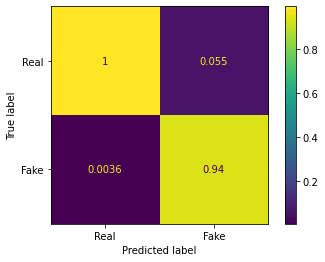

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true=[]
predictions=[]
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]
            
        tokens_tensors, segments_tensors, masks_tensors = data[:3]
        test_outputs = model(input_ids=tokens_tensors, 
                    token_type_ids=segments_tensors, 
                    attention_mask=masks_tensors)

        logits = test_outputs[0]
        _, pred = torch.max(logits.data, 1)

        labels = data[3]
        true.extend(labels.cpu().tolist())
        predictions.extend(pred.cpu().tolist())


cm = confusion_matrix(true, predictions, labels=[1, 0], normalize='pred')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot()

print('Acc: ', accuracy_score(predictions,true))

In [ ]:
df = pd.DataFrame({"pred_label": predictions})

df_pred = pd.concat([testset.df.loc[:, ['title']], 
                          testset.df.loc[:, ['true']], 
                          df.loc[:, 'pred_label']], axis=1)
df_pred.to_csv('bert_1_prec_training_samples.csv', index=False)
df_pred

,title,true,pred_label
0,"Defense chief Mattis in Asia, will discuss Nor...",1,1
1,Republican lawmakers: health plan tax credit c...,1,1
2,Militant gunmen in Egypt mosque attack carried...,1,1
3,Malay set to be Singapore's first woman presid...,1,1
4,Lawmakers see strong board as part of Puerto R...,1,1
...,...,...,...
4686,OBAMA BRAGS About Hijacking 1.35 Million Acres...,0,0
4687,"Glad to see Obama go, Gulf Arabs expect Trump ...",1,1
4688,Black Politician Explains Why Left’s ‘Racist’ ...,0,0
4689,First German immigration law on agenda as Merk...,1,1


In [ ]:
print(classification_report(df_pred.true, df_pred.pred_label))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       476
           1       1.00      0.99      1.00      4215

    accuracy                           0.99      4691
   macro avg       0.97      0.98      0.98      4691
weighted avg       0.99      0.99      0.99      4691



## Insight on Wrong Classification

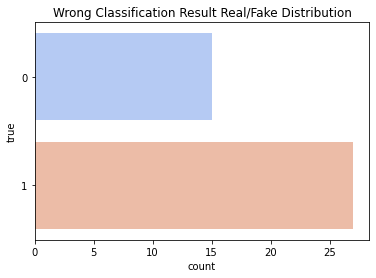

In [ ]:
wrong_df = df_pred[df_pred.true != df_pred.pred_label]
sns.countplot(y="true", palette="coolwarm", data=wrong_df).set_title('Wrong Classification Result Real/Fake Distribution')
plt.show()

In [ ]:
wrong_titles = df_pred[df_pred.true != df_pred.pred_label].title.values
wrong_titles

array(['Teenage IS supporter guilty of plotting attack on Bieber concert in UK',
       'Fake letters tell Germans the web has worked out their vote',
       'U.S. lawmakers introduce bill to criminalize ‘revenge porn’',
       'DESPERATE TO STOP THE FLOW OF MUSLIM REFUGEES INTO SWEDEN, Swedish Citizens Devise A Controversial Scheme',
       ' Michelle Obama: Research Proves We Can Lift Economy By Educating Girls',
       'Grammar fail, or do Texas Republicans believe most Texans are gay?',
       ' Intelligence Officials SKEWER Trump For Politicizing Classified Briefings',
       ' Thanks To Obamacare, America Will Save $2.6 Trillion In Healthcare Spending',
       ' GOP Senator Says Flynn Stonewalling Russia Investigation',
       'Who are Paul Manafort and Rick Gates?',
       'The Big Squeeze: This election year, it’s all about the money',
       'Woman who accused Bill Clinton of assault to campaign against Hillary presidential run',
       'Angola’s first new president in 38 year